# Comparación

Vamos a hacer una simple comparación entre los tres algoritmos en casos distribuidos aleatoriamente. Esto nos permitirá ver que algoritmo se comporta mejor.

Simple.

In [32]:
!mkdir ../instancias
!mkdir ../instancias/comparacion # crea la carpeta para instancias aleatorias

mkdir: ../instancias: File exists


`gen` es un generador de instancias.
- `k` es la cantidad de instancias que genera
- `_R` el rango para los valores aleatorios de $R$
- `n` la cantidad de elementos
- `_w` y `_r` los rangos para los valores aleatorios de $w_i$ y $r_i$
- 

In [33]:
import numpy as np

def gen(
    ns,
    k = 100,
    _R = (500, 1000),
    _w = (1, 100),
    _r = (800, 1000),
    _path = "../instancias/comparacion/"
):
    for i in ns:
        for j in range(k):
            R = np.random.randint((_R[1] - _R[0])) + _R[0]
            w = np.random.randint((_w[1] - _w[0]), size = i) + _w[0]
            r = np.random.randint((_r[1] - _r[0]), size = i) + _r[0]

            f = open((_path + "{}_{}.in").format(i, j), "x")
            f.write("{} {}\n".format(i, R))
            for k in range(i-1):
                f.write("{} {}\n".format(w[k], r[k]))
            f.write("{} {}".format(w[i-1], r[i-1]))
            f.close()

Vamos a variar $n$ de 1 a 20.

In [34]:
path = "../instancias/comparacion/"
ns = np.arange(1, 30, 3)
_k = 100

gen(ns, k = _k, _path = path)

Compilamos

In [35]:
import os

os.system("g++ ../src/main.cpp -o ../algo3-tp1")

0

In [41]:
import time

perf_fb = [] # tiempos de ejecucion de fb
perf_bt = [] # tiempos de ejecucion de bt
perf_pd = [] # tiempos de ejecucion de pd

for i in ns:
    el_fb = 0 # acumuladores de tiempos de ejecucion
    el_bt = 0
    el_pd = 0

    for j in range(_k):
        start = time.time()
        os.system("./../bin/algo3-tp1 "+path+"{}_{}.in 1".format(i, j))
        el_fb += time.time() - start

        start = time.time()
        os.system("./../bin/algo3-tp1 "+path+"{}_{}.in 2".format(i, j))
        el_bt += time.time() - start

        start = time.time()
        os.system("./../bin/algo3-tp1 "+path+"{}_{}.in 3".format(i, j))
        el_pd += time.time() - start 

        
    perf_fb.append(el_fb / _k)
    perf_bt.append(el_bt / _k)
    perf_pd.append(el_pd / _k)


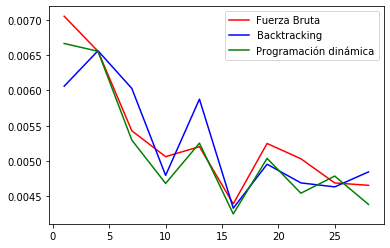

In [42]:
import matplotlib.pyplot as plt

# Plot the data
plt.plot(ns, perf_fb, color = 'red', label = "Fuerza Bruta")
plt.plot(ns, perf_bt, color = 'blue', label = "Backtracking")
plt.plot(ns, perf_pd, color = 'green', label = "Programación dinámica")

plt.legend()

# Show the plot
plt.show()